# 1b_create_contour_data.py

In [1]:
import os
import re
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import imutils as im # file created by Rafael
import datetime as dt
import matplotlib.pyplot as plt

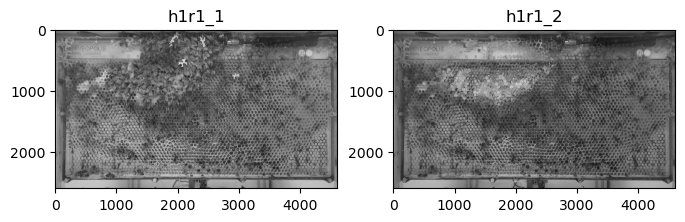

done - optical flow (4.4s)
done - core contour (15.7s)


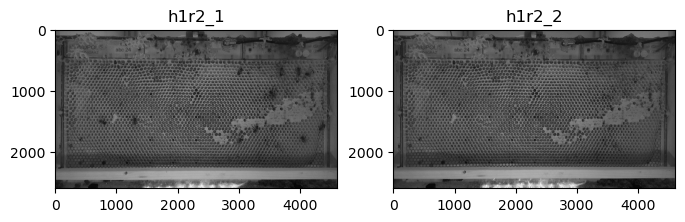

done - optical flow (3.4s)
done - core contour (13.8s)


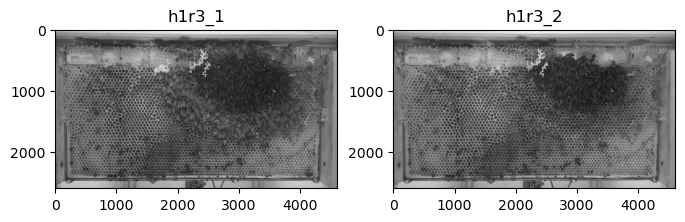

done - optical flow (3.8s)
done - core contour (15.4s)


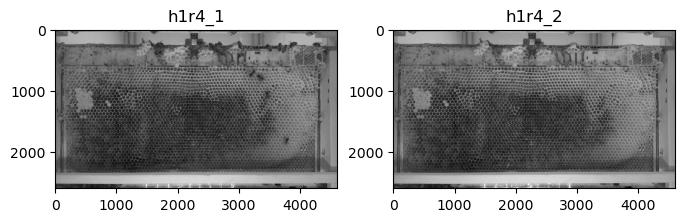

done - optical flow (3.6s)
done - core contour (14.9s)


In [17]:
src_dir = os.getcwd()
rpi = 'rpi4'
img_sf = 0.6 # resize by 60% (faster than 100%)
# days = ['2012%02d' % d for d in range(1, 8)]

# print(days)

dates = []
regex = r"\d{6}-\d{6}"

all_dates = []
all_imgs_a = []
all_imgs_b = []
image_size = []
core_center_px = []
core_center_mm = []
core_area_px = []
core_area_mm = []
core_contour = []
cluster_center_px = []
cluster_center_mm = []
cluster_area_px = []
cluster_area_mm = []
cluster_contour = []
area_ratio = []

# test1 = cv.imread("h1r1_1.jpg")
# fig, ax0 = plt.subplots(1, 1, figsize=(8, 4))
# ax0.imshow(test1, cmap='gray')
# plt.show()

for x in range(4):

        img_a = src_dir + "/lighting_V1/h1r" + str(x+1) + "_1" + ".jpg"
        img_b = src_dir + "/lighting_V1/h1r" + str(x+1) + "_2" + ".jpg"

        # print(img_a)
        # print(type(img_a))
        # print(img_b)
        # print(type(img_b))
        t_ini = dt.datetime.now()

        frame1 = cv.imread(img_a, cv.IMREAD_GRAYSCALE)
        frame2 = cv.imread(img_b, cv.IMREAD_GRAYSCALE)

        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
        ax0.imshow(frame1, cmap='gray')
        ax1.imshow(frame2, cmap='gray')
        ax0.set_title('h1r' + str(x+1) + '_1')
        ax1.set_title('h1r' + str(x+1) + '_2')
        plt.show()

        # Apply transformations to raw images
        # frame1_beauty = im.beautify_frame(frame1, rpi)
        # frame2_beauty = im.beautify_frame(frame2, rpi)
        # print('done - beautyfication (%.1fs)' % (dt.datetime.now()-t_ini).total_seconds())

        # fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
        # ax0.imshow(frame1_beauty, cmap='gray')
        # ax1.imshow(frame2_beauty, cmap='gray')
        # ax0.set_title('h1r' + str(x+1) + '_1')
        # ax1.set_title('h1r' + str(x+1) + '_2')
        # plt.show()

        # frame1_beauty_small = cv.resize(frame1_beauty, (0, 0), fx=img_sf, fy=img_sf)
        # frame2_beauty_small = cv.resize(frame2_beauty, (0, 0), fx=img_sf, fy=img_sf)

        frame1_beauty_small = cv.resize(frame1, (0, 0), fx=img_sf, fy=img_sf)
        frame2_beauty_small = cv.resize(frame2, (0, 0), fx=img_sf, fy=img_sf)

        image_size = frame1_beauty_small.shape

        # Calculate the optical flow to allow finding the cluster core
        flow, of_mag, of_ang = im.compute_dense_optical_flow(frame1_beauty_small, frame2_beauty_small)
        print('done - optical flow (%.1fs)' % (dt.datetime.now()-t_ini).total_seconds())

        # Find the cluster core
        (core_cx, core_cy), biggest_contour, cr_area = im.find_biggest_active_area(of_mag)

        core_contour_x = biggest_contour[:, 0, 0]
        core_contour_y = biggest_contour[:, 0, 1]

        # Convert core center from pixels to mm
        core_cx_mm = np.round(im.px_to_mm(frame1_beauty_small, core_cx, rpi, _axis='x'),2)
        core_cy_mm = np.round(im.px_to_mm(frame1_beauty_small, core_cy, rpi, _axis='y'),2)
        cr_area_mm = np.round(im.px_to_mm(frame1_beauty_small, cr_area, rpi, _axis='area'),2)

        core_center_px.append((core_cx, core_cy))
        core_center_mm.append((core_cx_mm, core_cy_mm))
        core_area_px.append(cr_area)
        core_area_mm.append(cr_area_mm)
        core_contour.append((core_contour_x, core_contour_y))
        print('done - core contour (%.1fs)' % (dt.datetime.now() - t_ini).total_seconds())

        # Find cluster external edge
        (cluster_cx, cluster_cy), cluster_cnt, cl_area, img_t = im.find_cluster_contour(frame1_beauty_small,
                        im.load_bg_img('./outputs/2_zigzag/background/%s/'%rpi, scale_factor=img_sf))

        cluster_contour_x = cluster_cnt[:, 0, 0]
        cluster_contour_y = cluster_cnt[:, 0, 1]

#         # Convert core center from pixels to mm
#         cluster_cx_mm = np.round(im.px_to_mm(frame1_beauty_small, cluster_cx, rpi, _axis='x'),2)
#         cluster_cy_mm = np.round(im.px_to_mm(frame1_beauty_small, cluster_cy, rpi, _axis='y'),2)
#         cl_area_mm = np.round(im.px_to_mm(frame1_beauty_small, cl_area, rpi, _axis='area'),2)

#         cluster_center_px.append((cluster_cx, cluster_cy))
#         cluster_center_mm.append((cluster_cx_mm, cluster_cy_mm))
#         cluster_contour.append((cluster_contour_x, cluster_contour_y))
#         cluster_area_px.append(cl_area)
#         cluster_area_mm.append(cl_area_mm)
#         print('done - cluster contour (%.1fs)' % (dt.datetime.now() - t_ini).total_seconds())

#         area_ratio.append( np.round( cr_area/cl_area ,2))

#         t_tot = dt.datetime.now() - t_ini
#         print("%.1f s" % t_tot.total_seconds())

# # Create the DataFrame
# data = {'images_1': frame1,
#         'images_2': frame2,
#         # 'image_dim_resized': image_size, # All fields must be arrays with same size
#         # 'image_resize_factor': img_sf,
#         'cluster_contour': cluster_contour,
#         'cluster_center_px': cluster_center_px,
#         'cluster_center_mm': cluster_center_mm,
#         'cluster_area_px': cluster_area_px,
#         'cluster_area_mm': cluster_area_mm,
#         'core_contour': core_contour,
#         'core_center_px': core_center_px,
#         'core_center_mm': core_center_mm,
#         'core_area_px': core_area_px,
#         'core_area_mm': core_area_mm,
#         'area_ratio': area_ratio }

# df_cluster = pd.DataFrame(data, index=all_dates)

# # Save to a pickle file
# # fn = "1b_cluster_contours_%s_df.pkl" % rpi
# fn = "temp.pkl"
# df_cluster.to_pickle(fn)

# print("Pickl file created (%s)" % fn )


# fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(8, 19))
# ax0.imshow(frame1_beauty, cmap='gray')
# ax1.imshow(frame1_beauty_small, cmap='gray')
# ax2.imshow(of_mag)

# ax3.imshow(frame1_beauty_small, cmap='gray')
# ax3.plot(core_contour_x, core_contour_y, c='m')
# ax3.scatter(core_cx, core_cy, s=40, c='r')

# ax4.imshow(frame1_beauty_small, cmap='gray')
# ax4.plot(cluster_contour_x, cluster_contour_y, c='c')
# ax4.scatter(cluster_cx, cluster_cy, s=40, c='b')
# plt.show()
# plt.close()

# 1a_process_ilastik

In [1]:
'''
1. Get the masks from ilastik
2. Perform morphological operations to remove noise and fill holes
3. Find the biggest contour
4. Get the centroid of the biggest contour
5. Save the mask with the area of the biggest contour and the centroid on the filename
'''

import glob
import cv2 as cv
import numpy as np

In [2]:

p_in = '/Users/fabianprofeta/Desktop/PDS-IR-imaging/IR-imaging-2024/lighting_V1/'
# where to save masks
p_out = '/Users/fabianprofeta/Desktop/PDS-IR-imaging/IR-imaging-2024/lighting_V1/masks/'

files = sorted(glob.glob(p_in + '*.jpg'))

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (4, 4))
# kernel1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1, 1))

for i, f in enumerate(files):
    print(i, len(files))

    # Read and invert image
    frame_bw = cv.bitwise_not(cv.imread(files[i]))

    ## Opening is just another name of erosion followed by dilation. It is useful in removing noise
    frame_no_bg = cv.morphologyEx(frame_bw, cv.MORPH_OPEN, kernel, iterations=5)

    frame_no_bg = cv.morphologyEx(frame_no_bg, cv.MORPH_CLOSE, kernel, iterations=5)

    # print('showing image')
    # cv.imshow('frame_bw', frame_bw)
    # cv.imshow('frame_no_bg', frame_no_bg)


    # # Threshold it so it becomes binary
    # ret, thresh = cv.threshold(frame_no_bg, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(frame_no_bg[:, :, 0], 4, cv.CV_32S)
    # # num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(frame_no_bg, 4, cv.CV_32S)
    # # # Different end domains give different colors
    # # output = np.zeros((frame_no_bg.shape[0], frame_no_bg.shape[1], 3), np.uint8)
    # # for i in range(1, num_labels):
    # #     mask = labels == i
    # #     output[:, :, 0][mask] = np.random.randint(0, 255)
    # #     output[:, :, 1][mask] = np.random.randint(0, 255)
    # #     output[:, :, 2][mask] = np.random.randint(0, 255)
    # # cv.imshow('oginal', output)
    # # cv.waitKey()
    # # cv.destroyAllWindows()


    contours, hierarchy = cv.findContours(frame_no_bg[:, :, 0], cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    # contours, hierarchy= cv.findContours(frame_no_bg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    contour_areas = np.array([cv.contourArea(cnt) for cnt in contours])

    MIN_BEE_AREA = 50  # areas smaller than MIN_BEE_AREA are excluded
    idx_a = contour_areas > MIN_BEE_AREA
    contours = np.array(contours)
    contours = contours[idx_a]
    contour_areas = contour_areas[idx_a]

    ## Get the centroid of the biggest contour
    idx_big_area = np.argmax(contour_areas)
    # Calculate moments for each contour
    M = cv.moments(contours[idx_big_area])
    # Calculate x,y coordinate of center
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # print(cX, cY)

    # cv.circle(frame_no_bg, (cX, cY), 15, (128, 128, 255), -1)
    # cv.imshow('frame_no_bg', frame_no_bg)

    ###
    # cv.drawContours(frame_no_bg, contours, -1, (0,255,0), 2)
    #
    # # Create copy of image
    # height, width = frame_no_bg.shape[:2]
    # img_big_contours = np.zeros((height, width, 1), np.uint8)
    #
    # idx_big_area = np.argmax(contour_areas)
    # cv.fillPoly(img_big_contours, contours[idx_big_area], 128)
    #
    # # cv.fillPoly(img_big_contours, contours, 128)
    # cv.imshow('img_big_contours', img_big_contours)

    # area, in percent, occupied by white pixels (ie occupied by bees)
    img_tot_px = frame_no_bg[:, :, 0].size
    # number of pixels that are white
    idx_white = np.where(frame_no_bg[:, :, 0] == 255)
    img_white_px = len(idx_white[0])

    img_white_area = round(img_white_px / img_tot_px * 100, 1)

    cv.imwrite(p_out + "%s_a%02.1f_x%04dy%04d.png" % (files[i].split('/')[-1][:32], img_white_area, cX, cY), frame_no_bg)

    # cv.waitKey(0)
    # cv.destroyAllWindows()

print("DONE!")


0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
DONE!


In [5]:
import glob
import imutils
import cv2 as cv
import numpy as np

# Resize parameter
percentage = 50  # specify your percentage here

color = 'red'  # 'red' or 'yellow'
p_imgs  = '/Users/fabianprofeta/Desktop/PDS-IR-imaging/IR-imaging-2024/lighting_V1/'
p_fills = '/Users/fabianprofeta/Desktop/PDS-IR-imaging/IR-imaging-2024/lighting_V1/masks/'
p_out   = '/Users/fabianprofeta/Desktop/PDS-IR-imaging/IR-imaging-2024/lighting_V1/masks_overlay/'

imgs = sorted(glob.glob(p_imgs + '*.jpg'))
masks = sorted(glob.glob(p_fills + '*.png'))

c = None
if color == 'yellow':
    c = [0, 210, 255]
elif color == 'red':
    c = [0, 0, 255]

for i in range(len(imgs)):
    print(i, len(imgs))

    img = cv.imread(imgs[i])
    mask = cv.imread(masks[i])

    # Change color of mask to red
    mask[(mask == 255).all(-1)] = c

    dst = cv.addWeighted(img, 1.0, mask, 0.2, 0)

    resized_img = cv.resize(dst, (int(dst.shape[1] * percentage / 100), int(dst.shape[0] * percentage / 100)))

    cv.imwrite(p_out + masks[i].split('/')[-1][:38] + '_fill.jpg', resized_img)

print('DONE')


0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
DONE
